In [1]:
import pandas as pd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
df= pd.read_excel('after_EDA_new1.xlsx')

In [3]:
df.head()

Unnamed: 0   AVG_UTILIZE  CR_CARD_LIMIT CR_CARD_CUSCOUN CR_CARD_CSTATUS  \
0           0   1756.446667          20000       SRI LANKA            NORM   
1           1   2126.466667         180000       SRI LANKA            NORM   
2           2   7828.763333          50000       SRI LANKA            NORM   
3           3   1276.666667          24000       SRI LANKA            NORM   
4           4  20623.063333          42000       SRI LANKA            NORM   

   CR_CARD_VIP   STR_CR_CARD_NUM  CR_CARD_ARR CR_CARD_STAFF  \
0            0  4157380000039007            0             N   
1            0  4157380000055003            0             N   
2            0  4157380000060029            0             N   
3            0  4157380000066018            0             N   
4            0  4157380000072008            0             N   

  CR_EXPIRYDATESTATUS  ... DEBIT_CARD_USAGE     NII AGE     CC_AGE  \
0                   A  ...              0.0  -67.06  80  26.083333   
1                   A  ...         125000.0  409.07  52  26.000000   
2                   A  ...              0.0   13.70  63  26.000000   
3                   A  ...              0.0  812.40  61  26.000000   
4                   A  ...              0.0  128.78  56  25.916667   

  CUSTOMER_DEBIT_ACC CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                  3                       0.00                    0   
1                  2                   55461.72                    0   
2                  0                       0.00                    0   
3                  1                   47205.46                    0   
4                  1                  170194.41                    0   

  CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  
0                         0.0               8.782233     8.008889  
1                         0.0               1.181370    41.744973  
2                         0.0              15.657527  3713.374413  
3                         0.0               5.319444     9.591558  
4                         0.0              49.102532    95.901806  

[5 rows x 39 columns]

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = df[df['CR_CARD_OVERDUE_STATUS'] == 'G']

In [7]:
df.shape

(60284, 39)

In [8]:
df_selected = df[['STR_CR_CARD_NUM', 'AVG_LIMIT_UTILIZATION','AGE', 'PAYMENT_AVG', 'CC_AGE','CUSTOMER_DEBIT_ACC_BALANCE','CUSTOMER_PROFITABILITY'
    
                ]]

In [9]:
df_selected.head()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION  AGE  PAYMENT_AVG     CC_AGE  \
0  4157380000039007               8.782233   80     8.008889  26.083333   
1  4157380000055003               1.181370   52    41.744973  26.000000   
2  4157380000060029              15.657527   63  3713.374413  26.000000   
3  4157380000066018               5.319444   61     9.591558  26.000000   
4  4157380000072008              49.102532   56    95.901806  25.916667   

   CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_PROFITABILITY  
0                        0.00                  -67.06  
1                    55461.72                  549.07  
2                        0.00                   13.70  
3                    47205.46                  812.40  
4                   170194.41                  148.78

In [10]:
df_selected = df_selected[df_selected['AVG_LIMIT_UTILIZATION'] >= 5]

In [11]:
df_selected = df_selected[df_selected['PAYMENT_AVG'] >= -100000]

In [21]:
df_selected = df_selected[df_selected['AGE'] >=18]

In [22]:
df_selected.shape

(22878, 7)

In [23]:
# Assuming 'df_selected' is your DataFrame
df_new = df_selected.drop(columns=['STR_CR_CARD_NUM'],axis=1)
df_new.head()

AVG_LIMIT_UTILIZATION  AGE  PAYMENT_AVG     CC_AGE  \
0               8.782233   80     8.008889  26.083333   
2              15.657527   63  3713.374413  26.000000   
3               5.319444   61     9.591558  26.000000   
4              49.102532   56    95.901806  25.916667   
6              18.551333   60    66.104647  25.916667   

   CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_PROFITABILITY  
0                        0.00                  -67.06  
2                        0.00                   13.70  
3                    47205.46                  812.40  
4                   170194.41                  148.78  
6                    37060.15                  249.37

In [24]:
df_new.shape

(22878, 6)

In [25]:
df_new.dtypes

AVG_LIMIT_UTILIZATION         float64
AGE                             int64
PAYMENT_AVG                   float64
CC_AGE                        float64
CUSTOMER_DEBIT_ACC_BALANCE    float64
CUSTOMER_PROFITABILITY        float64
dtype: object

In [26]:
df_new.isna().sum()

AVG_LIMIT_UTILIZATION         0
AGE                           0
PAYMENT_AVG                   0
CC_AGE                        0
CUSTOMER_DEBIT_ACC_BALANCE    0
CUSTOMER_PROFITABILITY        0
dtype: int64

In [27]:
from sklearn.preprocessing import MinMaxScaler
X = pd.DataFrame(MinMaxScaler().fit_transform(df_new))

In [29]:
X = np.asarray(X)

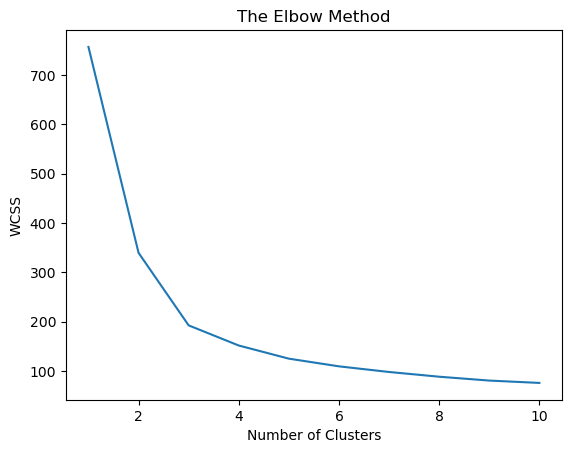

In [39]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=500, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X is your feature matrix (DataFrame or ndarray)

n_clusters = 3

# Initialize the clusterer with n_clusters value and a random generator
# seed of 42 for reproducibility.
clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=400, random_state=45862)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.5136005425844358


In [31]:
df_selected['cluster_label'] = cluster_labels

# Create a dictionary to store dataframes for each cluster
cluster_dataframes = {}

# Iterate over each cluster label
for cluster_num in range(n_clusters):
    # Filter the original DataFrame to create a dataframe for the current cluster
    cluster_dataframes[f'df_cluster_{cluster_num}'] = df_selected[df_selected['cluster_label'] == cluster_num].copy()

# Now cluster_dataframes is a dictionary containing separate dataframes for each cluster
# Each dataframe is stored with a variable name like df_cluster_0, df_cluster_1, etc.

# Print the first few rows of each cluster dataframe
for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"{cluster_name} dataframe:")
    print(cluster_df.head())
    print()


df_cluster_0 dataframe:
       STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION  AGE  PAYMENT_AVG    CC_AGE  \
480   4157385011587001               5.333333   44     8.325423  5.250000   
7949  4157385100001278              21.149053   57   256.316192  4.416667   
7951  4157385100001310               8.765667   44  1228.701031  4.916667   
7955  4157385100001401              11.387315   35     2.034920  4.833333   
7956  4157385100001468              16.666667   63    85.330076  4.750000   

      CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_PROFITABILITY  cluster_label  
480                   1521493.47                11167.52              0  
7949                    80146.60                 3232.51              0  
7951                 67848952.83                73204.07              0  
7955                   758654.86                39130.84              0  
7956                    39945.75                 1028.17              0  

df_cluster_1 dataframe:
     STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION 

In [32]:
cluster_counts = pd.Series(cluster_labels).value_counts()
cluster_counts

0    15168
1     6596
2     1114
Name: count, dtype: int64

In [33]:
# Access the dataframe for cluster 1 using the dictionary
df_cluster_0 = cluster_dataframes['df_cluster_0']

# Now you can use df_cluster_1.head() to view the first few rows of the dataframe
print(df_cluster_0.head())


       STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION  AGE  PAYMENT_AVG    CC_AGE  \
480   4157385011587001               5.333333   44     8.325423  5.250000   
7949  4157385100001278              21.149053   57   256.316192  4.416667   
7951  4157385100001310               8.765667   44  1228.701031  4.916667   
7955  4157385100001401              11.387315   35     2.034920  4.833333   
7956  4157385100001468              16.666667   63    85.330076  4.750000   

      CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_PROFITABILITY  cluster_label  
480                   1521493.47                11167.52              0  
7949                    80146.60                 3232.51              0  
7951                 67848952.83                73204.07              0  
7955                   758654.86                39130.84              0  
7956                    39945.75                 1028.17              0  


In [34]:
# Access the dataframe for cluster 1 using the dictionary
df_cluster_1 = cluster_dataframes['df_cluster_1']

# Now you can use df_cluster_1.head() to view the first few rows of the dataframe
print(df_cluster_1.head())


     STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION  AGE  PAYMENT_AVG     CC_AGE  \
60  4157384100160002              10.352531   56    24.616585  11.000000   
64  4157384100176016              20.337778   43 -5955.293805  10.583333   
67  4157384100184002              20.342613   59   433.649013  10.583333   
68  4157384100189001              14.115669   53   161.854385  10.583333   
69  4157384100192005               7.360236   71    23.663818  10.583333   

    CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_PROFITABILITY  cluster_label  
60                    16104.00                 1839.97              1  
64                 14339386.76                34398.63              1  
67                     7368.99                  120.47              1  
68                  2549595.99                 8835.77              1  
69                   326386.86                 3909.88              1  


In [35]:
# Access the dataframe for cluster 1 using the dictionary
df_cluster_2 = cluster_dataframes['df_cluster_2']

# Now you can use df_cluster_1.head() to view the first few rows of the dataframe
print(df_cluster_2.head())

    STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION  AGE  PAYMENT_AVG     CC_AGE  \
0  4157380000039007               8.782233   80     8.008889  26.083333   
2  4157380000060029              15.657527   63  3713.374413  26.000000   
3  4157380000066018               5.319444   61     9.591558  26.000000   
4  4157380000072008              49.102532   56    95.901806  25.916667   
6  4157380000089002              18.551333   60    66.104647  25.916667   

   CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_PROFITABILITY  cluster_label  
0                        0.00                  -67.06              2  
2                        0.00                   13.70              2  
3                    47205.46                  812.40              2  
4                   170194.41                  148.78              2  
6                    37060.15                  249.37              2  


In [36]:
df_cluster_0.describe()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION           AGE   PAYMENT_AVG  \
count     1.516800e+04           15168.000000  15168.000000  1.516800e+04   
mean      4.381202e+15              19.413200     39.509098  1.747726e+03   
std       3.428227e+14              18.826229     11.480223  1.560747e+05   
min       4.157385e+15               5.000000     20.000000 -9.822795e+04   
25%       4.157390e+15               8.066667     30.000000  2.769678e+01   
50%       4.284170e+15              13.377687     37.000000  7.295443e+01   
75%       4.284174e+15              24.041190     47.000000  1.323859e+02   
max       5.583398e+15             525.701521     98.000000  1.908896e+07   

             CC_AGE  CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_PROFITABILITY  \
count  15168.000000                1.516800e+04            1.516800e+04   
mean       2.542211                2.076191e+06            6.944081e+03   
std        1.197035                1.831420e+07            4.773406e+04   
min        1.000000                0.000000e+00           -3.550918e+06   
25%        1.583333                0.000000e+00            0.000000e+00   
50%        2.250000                2.579783e+04            1.129430e+03   
75%        3.333333                3.211993e+05            4.772445e+03   
max        5.750000                1.522944e+09            2.088898e+06   

       cluster_label  
count        15168.0  
mean             0.0  
std              0.0  
min              0.0  
25%              0.0  
50%              0.0  
75%              0.0  
max              0.0

In [37]:
df_cluster_1.describe()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION          AGE    PAYMENT_AVG  \
count     6.596000e+03            6596.000000  6596.000000    6596.000000   
mean      4.348007e+15              18.060258    49.443299     184.200415   
std       3.868932e+14              22.439731    11.911258    6340.267496   
min       4.157384e+15               5.000000    23.000000  -84126.066914   
25%       4.157385e+15               7.529558    40.000000      24.051961   
50%       4.157390e+15              11.959226    48.000000      64.383317   
75%       4.284170e+15              20.955423    57.000000     111.779634   
max       5.583390e+15             520.236240   231.000000  414072.633329   

            CC_AGE  CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_PROFITABILITY  \
count  6596.000000                6.596000e+03            6.596000e+03   
mean      7.985206                3.100302e+06            9.840732e+03   
std       2.007860                1.928066e+07            6.151553e+04   
min       1.833333                0.000000e+00           -7.283043e+05   
25%       6.500000                0.000000e+00            0.000000e+00   
50%       7.583333                4.224888e+04            1.203095e+03   
75%       9.250000                6.462143e+05            5.779448e+03   
max      13.500000                8.603636e+08            2.999834e+06   

       cluster_label  
count         6596.0  
mean             1.0  
std              0.0  
min              1.0  
25%              1.0  
50%              1.0  
75%              1.0  
max              1.0

In [38]:
df_cluster_2.describe()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION          AGE   PAYMENT_AVG  \
count     1.114000e+03            1114.000000  1114.000000   1114.000000   
mean      4.415642e+15              18.668138    58.082585     90.964753   
std       5.253624e+14              18.405078    10.531107   1162.574499   
min       4.157380e+15               5.009056    18.000000 -20673.095443   
25%       4.157385e+15               8.223952    50.000000     20.787858   
50%       4.157385e+15              12.814527    57.000000     63.219617   
75%       4.157389e+15              22.978240    65.000000    114.360824   
max       5.488070e+15             250.113571    94.000000  19386.572818   

            CC_AGE  CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_PROFITABILITY  \
count  1114.000000                1.114000e+03             1114.000000   
mean     18.932825                1.263567e+06             5099.090233   
std       2.826571                4.585725e+06            16967.675077   
min      13.333333                0.000000e+00            -4375.110000   
25%      16.916667                0.000000e+00                0.000000   
50%      18.583333                1.612908e+04              596.535000   
75%      20.729167                4.049368e+05             3319.125000   
max      26.833333                5.996063e+07           285380.480000   

       cluster_label  
count         1114.0  
mean             2.0  
std              0.0  
min              2.0  
25%              2.0  
50%              2.0  
75%              2.0  
max              2.0